<a href="https://colab.research.google.com/github/luckaiszin/Database/blob/main/175_Combine_Two_Tables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

link: https://leetcode.com/problems/combine-two-tables

In [3]:
import pandas as pd
import numpy as np

### My Solution: utilizando loc

In [4]:
def combine_two_tables(person: pd.DataFrame, address: pd.DataFrame) -> pd.DataFrame:
    X = pd.DataFrame({
        'personId': person['personId'],
        'firstName': person['firstName'],
        'lastName': person['lastName'],
        'city': np.nan,
        'state': np.nan
    })

    key = person['personId']
    address_key = address['personId']

    for id in key:
        if id in address_key.values:  # Certifique-se de verificar valores
            X.loc[X['personId'] == id, 'city'] = address.loc[address['personId'] == id, 'city'].values[0]
            X.loc[X['personId'] == id, 'state'] = address.loc[address['personId'] == id, 'state'].values[0]

    return X.drop('personId', axis=1)

#### loc e iloc

A função **loc()** no Pandas é usada para indexação baseada em rótulos, o que significa que você pode selecionar dados de um DataFrame usando os rótulos das linhas e colunas. Ela permite acessar um grupo de linhas e colunas pelos seus rótulos ou por um array booleano:

df.loc[linhas, colunas]



In [6]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [24, 27, 22, 32],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston']
}

df = pd.DataFrame(data)
print(df)

      Name  Age         City
0    Alice   24     New York
1      Bob   27  Los Angeles
2  Charlie   22      Chicago
3    David   32      Houston


In [8]:
#Select a single row by label:

print(df.loc[1])

Name            Bob
Age              27
City    Los Angeles
Name: 1, dtype: object


In [9]:
# Select specific rows and columns by labels:

print(df.loc[1:2, ['Name', 'City']])

      Name         City
1      Bob  Los Angeles
2  Charlie      Chicago


In [10]:
# Select all rows for specific columns:

print(df.loc[:, ['Name', 'Age']])

      Name  Age
0    Alice   24
1      Bob   27
2  Charlie   22
3    David   32


A função **iloc() **é baseada na localização por índices inteiros, o que significa que você usa os índices (posições) das linhas e colunas para selecionar os dados.

In [11]:
# Select a single row by index:

print(df.iloc[1])

Name            Bob
Age              27
City    Los Angeles
Name: 1, dtype: object


In [12]:
#Select specific rows and columns by indices:

print(df.iloc[1:3, 0:2])

      Name  Age
1      Bob   27
2  Charlie   22


In [14]:
# Select all rows for specific columns by indices:

print(df.iloc[:, [0, 2]])

      Name         City
0    Alice     New York
1      Bob  Los Angeles
2  Charlie      Chicago
3    David      Houston


Key Differences:


*   A função loc utiliza rótulos (nomes de linhas e colunas).
*   A função iloc utiliza índices inteiros (posições).



### Best Solution: utilizando merge

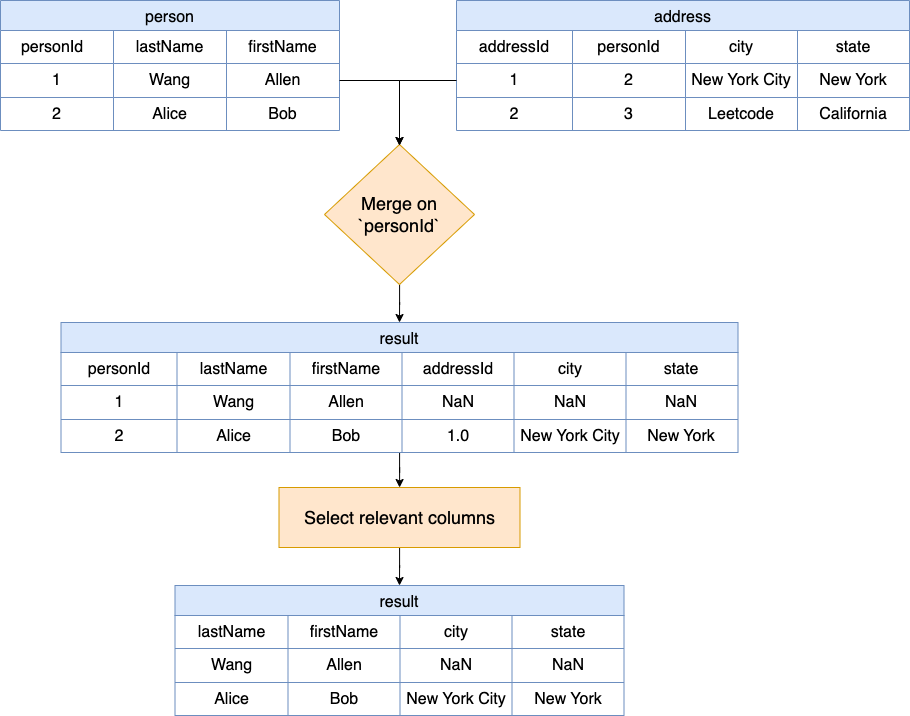

In [5]:
def combine_two_tables(person: pd.DataFrame, address: pd.DataFrame) -> pd.DataFrame:
    result = pd.merge(person, address, on='personId', how='left')
    result = result[['firstName', 'lastName', 'city', 'state']]
    return result